In [1]:
import h5py
import numpy as np
from skimage.util.shape import view_as_windows
import matplotlib.pyplot as plt

In [2]:
with h5py.File("averaging_test/U_avg.h5", "r") as file:
    U = file["matrix"][:]

with h5py.File("averaging_test/V_avg.h5", "r") as file:
    V = file["matrix"][:]

with h5py.File("averaging_test/M_avg.h5", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("averaging_test/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("averaging_test/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

# Replace nan in U and V into zeros.
U = np.nan_to_num(U) # (#step, 63, 53) dimensional numpy array.
V = np.nan_to_num(V)

In [3]:
def decode(elem):
    return elem.decode("UTF-8")

with h5py.File("start_points.h5", "r") as file:
    track_id = (list(map(decode, file["track_id"][:])))
    start_x_cor = file["start_x"][:] # List of 1 element lists
    start_y_cor = file["start_y"][:] # List of 1 element lists
    start_t = file["t_interval"][:]  # List of 2 element lists

In [5]:
def get_window_avg(ar, W, i, j):
    # For a given 2D numpy array "ar" extract at the index i,j the subarray with size W = (a, b).
    # Finally return the mean value of the window. 
    # Out of boundary regions are filled by 0.
    h0,h1 = (W[0]-1)//2, (W[1]-1)//2 
    ar_ext = np.pad(ar,((h0,h0),(h1,h1)),'constant',constant_values=(0,0))
    window = view_as_windows(ar_ext, (W[0],W[1]))[i,j]
    return np.mean(window)

In [13]:
def pseudo_tracking_piv_grid_single(U, V, t_interval, start_x, start_y, scale=(1, 1)):
    # U, V: (#total_time, 63, 63) dimensional
    # t_interval: [t0, t1] two element list
    # start_x: [x0] one element list
    # start_y: [y0] one element list
    
    # start_x and start_y integers inside x and y dimensions.
    # Firstly using the coordinate of vector field. 
    x_dim = np.shape(U)[1]
    y_dim = np.shape(U)[2]

    t_interval = range(t_interval[0], t_interval[1]+1)
    num_step = len(t_interval)
    
    trajectory_x = [start_x[0]]
    trajectory_y = [start_y[0]]

    for i in range(1,num_step):
        print(i)
        print("t_x= ",trajectory_x)
        print("t_y=", trajectory_y)
        
        x_cor = trajectory_x[i-1]
        y_cor = trajectory_y[i-1]
        t = t_interval[i]
        
        print("xcor="+str(x_cor))
        print("ycor="+str(y_cor))

        # Determine the vector directions through averaging surrounding neighbours.
        dx = get_window_avg(U[t], (3, 3), x_cor, y_cor)
        print("dx="+str(dx))
        dy = get_window_avg(V[t], (3, 3), x_cor, y_cor)
        print("dy="+str(dy))

        # Update of the start positions and round to the nearest integer.
        update_x_cor = scale[0] * round(x_cor + dx)
        update_y_cor = scale[1] * round(y_cor + dy)

        # Stops if comes to the image boundary. # TODO: Reweite it in a better way! 
        if update_x_cor < 0 or update_x_cor >= x_dim:
            trajectory_x.append(trajectory_x[i-1])
            trajectory_y.append(trajectory_y[i-1])
            continue
        elif update_y_cor < 0 or update_y_cor >= y_dim:
            trajectory_x.append(trajectory_x[i-1])
            trajectory_y.append(trajectory_y[i-1])
            continue
            
        trajectory_x.append(update_x_cor)
        trajectory_y.append(update_y_cor)

    return trajectory_x, trajectory_y # TODO: the rounding of y axis ist problematik!

In [14]:
test_x, test_y = pseudo_tracking_piv_grid_single(U, V, [81, 113], [55], [26])

1
t_x=  [55]
t_y= [26]
xcor=55
ycor=26
dx=3.8293211
dy=0.4107935
2
t_x=  [55, 59]
t_y= [26, 52]
xcor=59
ycor=52
dx=0.35991743
dy=-1.7915454
3
t_x=  [55, 59, 59]
t_y= [26, 52, 52]
xcor=59
ycor=52
dx=0.37338045
dy=-1.8863065
4
t_x=  [55, 59, 59, 59]
t_y= [26, 52, 52, 52]
xcor=59
ycor=52
dx=0.411385
dy=-1.6295433
5
t_x=  [55, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52]
xcor=59
ycor=52
dx=0.51323193
dy=-1.7179921
6
t_x=  [55, 59, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52, 52]
xcor=59
ycor=52
dx=0.47052193
dy=-1.5970061
7
t_x=  [55, 59, 59, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52, 52, 52]
xcor=59
ycor=52
dx=0.48247686
dy=-1.4010217
8
t_x=  [55, 59, 59, 59, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52, 52, 52, 52]
xcor=59
ycor=52
dx=0.6226046
dy=-1.5179157
9
t_x=  [55, 59, 59, 59, 59, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52, 52, 52, 52, 52]
xcor=59
ycor=52
dx=0.55865914
dy=-1.5477242
10
t_x=  [55, 59, 59, 59, 59, 59, 59, 59, 59, 59]
t_y= [26, 52, 52, 52, 52, 52, 52, 52, 52, 52]
xcor=59
ycor=52
dx

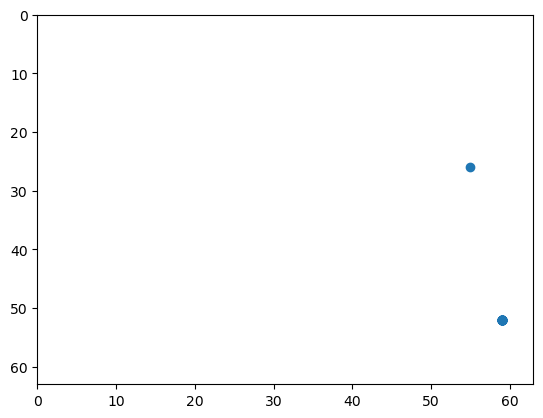

In [15]:
plt.scatter(test_x, test_y)
plt.xlim(0, 63)
plt.ylim(0, 63)
plt.gca().invert_yaxis()

In [23]:
get_window_avg(V[100], (3, 3), 56, 26)

0.18453534

In [ ]:
def pseudo_tracking_piv_grid(U, V, t_interval, start_x, start_y, scale=(1, 1)):
    